First 7 labels: [2 2 2 1 2 2 1]
Training Accuracy: 0.985
Testing Accuracy: 0.995


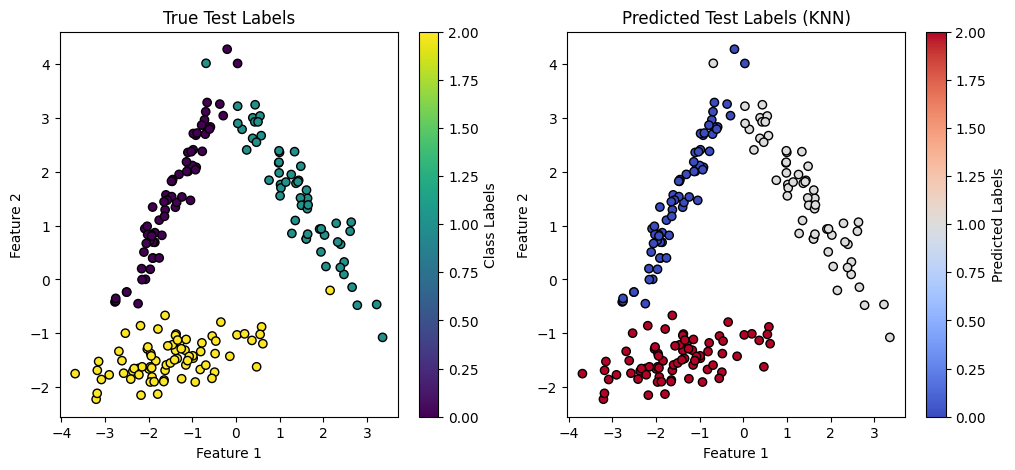

In [4]:
# Machine Learning Classification with Synthetic Data
# This script demonstrates supervised classification using KNN on a simulated dataset.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Generate Synthetic Classification Dataset
n_classes = 3  # Number of target classes

X, y = make_classification(
    n_samples=1000,          # Number of samples
    n_features=2,            # Number of features (for easy visualization)
    n_informative=2,         # All features are informative
    n_redundant=0,           # No redundant features
    n_repeated=0,            # No repeated features
    n_classes=n_classes,     # Number of classes
    n_clusters_per_class=1,  # One cluster per class
    class_sep=1.5,           # Separation between classes
    random_state=42          # Seed for reproducibility
)

print("First 7 labels:", y[:7])  # Example of class labels

# 2. Split Data Into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    test_size=0.2,
    random_state=42
)

# 3. Train and Evaluate KNN Classifier
# Train with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

# Train with custom KNN parameters
knn2 = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    n_jobs=1,
    n_neighbors=5,
    weights='uniform'
)
knn2.fit(X_train, y_train)
y_test_pred = knn2.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# 4. Visualize True vs Predicted Test Labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k')
plt.title("True Test Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class Labels")

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', edgecolors='k')
plt.title("Predicted Test Labels (KNN)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Labels")
plt.show()
